In [1]:
import networkx as nx
import dzcnapy_plotlib as dzcnapy

In [2]:
G = nx.Graph([("A", "eggs"),])

G.add_node("spinach") # Add a single node

G.add_node("Hg") # Add a single node by mistake

G.add_nodes_from(["folates", "asparagus", "liver"]) # Add a list of nodes

G.add_edge("spinach", "folates") # Add one edge, both ends exist

G.add_edge("spinach", "heating oil") # Add one edge by mistake

G.add_edge("liver", "Se") # Add one edge, one end does not exist

G.add_edges_from([("folates", "liver"), ("folates", "asparagus")])

In [3]:
G.remove_node("Hg")

G.remove_nodes_from(["Hg",]) # Safe to remove a missing node using a list

G.remove_edge("spinach", "heating oil")

G.remove_edges_from([("spinach", "heating oil"), ]) # See above

G.remove_node("heating oil") # Not removed yet

* You can use the method G.clear() to delete all graph nodes and edges at once
but keep the graph shell.

In [4]:
print(G.nodes(data=True))

[('A', {}), ('eggs', {}), ('spinach', {}), ('folates', {}), ('asparagus', {}), ('liver', {}), ('Se', {})]


In [5]:
print(G.edges(data=True))

[('A', 'eggs', {}), ('spinach', 'folates', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {})]


In [6]:
# the number of nodes 
print(len(G.nodes()))

# alternative way to get number of nodes
print(len(G))

# the number of edges
print(len(G.edges()))

7
7
5


### Read a Network from a CSV File

In [7]:
import matplotlib.pyplot as plt
import csv

with open("Data/code/nutrients.csv") as infile:

    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())
print(G.edges())
print(len(G))
print(len(G.edges()))

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']
[('A', 'carrots'), ('A', 'eggs'), ('A', 'fatty fish'), ('A', 'green leafy vegs'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('carrots', 'C'), ('eggs', 'B12'), ('eggs', 'riboflavin'), ('fatty fish', 'B6'), ('fatty fish', 'D'), ('fatty fish', 'B12'), ('fatty fish', 'niacin'), ('green leafy vegs', 'Mn'), ('green leafy vegs', 'C'), ('green leafy vegs', 'Ca'), ('green leafy vegs', 'E'), ('green leafy vegs', 'riboflavin'), ('liver', 'B6'), ('liver', 'Cu'), ('liver', 'folates'), ('liver', 'Se'), ('liver', 'Zn'), ('milk', 'B12'), ('milk', 'D'), ('milk', 'Ca'), ('milk', 'riboflavin'), ('tomat

In [8]:
# identifying self-loops 

loops = list(nx.selfloop_edges(G))
print(loops)

[('tomatoes', 'tomatoes')]


In [9]:
# removing self-loops edges

G.remove_edges_from(loops)
loops = list(nx.selfloop_edges(G))
loops

[]

### Relabel Nodes

`nx.relabel_nodes()` that takes a graph and a dictionary of old and new labels and either creates a relabeled copy of the graph (copy=True, default) or modifies the graph in place (use the latter option if the graph is large and you don’t plan to keep the original graph). Each dictionary key must be an existing node label, but some labels may be missing. The respective nodes will not be relabeled.

We will use dictionary comprehension to walk through all network nodes and capitalize node names.

* Graph is a node iterator. In fact, "G" has some other dict() features. For example, you can use selection operator []
to access the ***edges incident to the node***, and their attributes:

In [10]:
print(G["A"])

{'carrots': {}, 'eggs': {}, 'fatty fish': {}, 'green leafy vegs': {}, 'liver': {}, 'milk': {}, 'tomatoes': {}}


In [11]:
# create a dictioanry old node names as key and new node names as values  

mapping = {node: node.title() for node in G if isinstance(node, str)}
print(mapping)

{'A': 'A', 'carrots': 'Carrots', 'eggs': 'Eggs', 'fatty fish': 'Fatty Fish', 'green leafy vegs': 'Green Leafy Vegs', 'liver': 'Liver', 'milk': 'Milk', 'tomatoes': 'Tomatoes', 'B12': 'B12', 'B6': 'B6', 'asparagus': 'Asparagus', 'beans': 'Beans', 'kidneys': 'Kidneys', 'potatoes': 'Potatoes', 'C': 'C', 'pumpkins': 'Pumpkins', 'Ca': 'Ca', 'broccoli': 'Broccoli', 'cheese': 'Cheese', 'Cu': 'Cu', 'nuts': 'Nuts', 'whole grains': 'Whole Grains', 'D': 'D', 'mushrooms': 'Mushrooms', 'E': 'E', 'seeds': 'Seeds', 'Mn': 'Mn', 'legumes': 'Legumes', 'wheat': 'Wheat', 'Se': 'Se', 'Zn': 'Zn', 'beef': 'Beef', 'riboflavin': 'Riboflavin', 'niacin': 'Niacin', 'folates': 'Folates', 'spinach': 'Spinach', 'poultry': 'Poultry', 'shellfish': 'Shellfish', 'thiamin': 'Thiamin', 'veg oils': 'Veg Oils', 'yogurt': 'Yogurt'}


In [12]:
# capitalize all node names

nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


## Add Attributes

A node or edge attribute describes its non-structural properties. An attribute is implemented as a dictionary associated with the node or edge. The dictionary keys are attribute names. As such, they must be immutable: int(), float(), bool(), str(), and so on. There are no limitations on the values.

* Let’s create
a boolean attribute "nutrient" that is true for nutrients and false for foods.

In [13]:
# nutrient list
# converted into set that have constant lookup time.
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
"Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))

# create a dictionary shows whether it is a nutrient or food
nutrient_dict = {node: (node in nutrients) for node in G}
print(nutrient_dict)

{'A': True, 'B12': True, 'B6': True, 'C': True, 'Ca': True, 'Cu': True, 'D': True, 'E': True, 'Mn': True, 'Se': True, 'Zn': True, 'Carrots': False, 'Eggs': False, 'Fatty Fish': False, 'Green Leafy Vegs': False, 'Liver': False, 'Milk': False, 'Tomatoes': False, 'Asparagus': False, 'Beans': False, 'Kidneys': False, 'Potatoes': False, 'Pumpkins': False, 'Broccoli': False, 'Cheese': False, 'Nuts': False, 'Whole Grains': False, 'Mushrooms': False, 'Seeds': False, 'Legumes': False, 'Wheat': False, 'Beef': False, 'Riboflavin': True, 'Niacin': True, 'Folates': True, 'Spinach': False, 'Poultry': False, 'Shellfish': False, 'Thiamin': True, 'Veg Oils': False, 'Yogurt': False}


In [14]:
# create a boolean attribute "nutrient" that is true for nutrients and false for foods

nx.set_node_attributes(G, nutrient_dict, "nutrient")
print(G.nodes(data=True))

[('A', {'nutrient': True}), ('B12', {'nutrient': True}), ('B6', {'nutrient': True}), ('C', {'nutrient': True}), ('Ca', {'nutrient': True}), ('Cu', {'nutrient': True}), ('D', {'nutrient': True}), ('E', {'nutrient': True}), ('Mn', {'nutrient': True}), ('Se', {'nutrient': True}), ('Zn', {'nutrient': True}), ('Carrots', {'nutrient': False}), ('Eggs', {'nutrient': False}), ('Fatty Fish', {'nutrient': False}), ('Green Leafy Vegs', {'nutrient': False}), ('Liver', {'nutrient': False}), ('Milk', {'nutrient': False}), ('Tomatoes', {'nutrient': False}), ('Asparagus', {'nutrient': False}), ('Beans', {'nutrient': False}), ('Kidneys', {'nutrient': False}), ('Potatoes', {'nutrient': False}), ('Pumpkins', {'nutrient': False}), ('Broccoli', {'nutrient': False}), ('Cheese', {'nutrient': False}), ('Nuts', {'nutrient': False}), ('Whole Grains', {'nutrient': False}), ('Mushrooms', {'nutrient': False}), ('Seeds', {'nutrient': False}), ('Legumes', {'nutrient': False}), ('Wheat', {'nutrient': False}), ('Beef'

### Visualize a Network with Matplotlib

In [15]:
# prepare a color sequence (pink vs. yellow, depending on the node type) for the nodes.


colors = ["yellow" if n[1]["nutrient"] else "pink" for n in G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

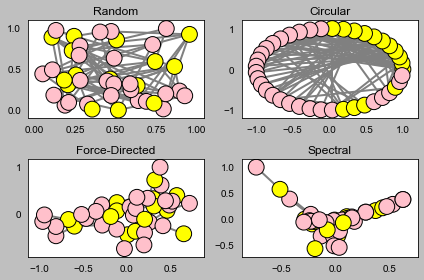

In [16]:
# Draw four layouts in four subplots
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, **dzcnapy.medium_attrs)
    plot.set_title(title)
    dzcnapy.set_extent(pos, plot)

dzcnapy.plot("nutrients")

### Harness Graphviz

* graphviz is an open source graph visualization tool
* Due to the better overall layout quality, the node labels have better
chances of not overlapping and should not be disabled

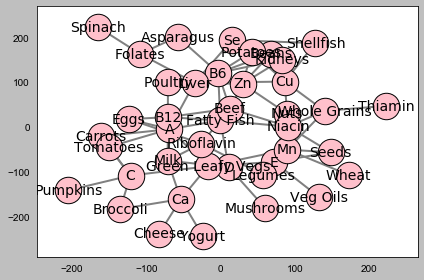

In [20]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.font_manager

_, plot = plt.subplots()
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients-graphviz")

In [21]:
# nx.write_graphml(G, "nutrients.graphml")

nx.write_graphml(G, "nutrients.graphml")

Source : Dmitry Zinoviev - Complex Network Analysis in Python